## Naive Bayes

#### Calismanin Amaclari:
- Devamli degiskenlerde Naive bayes'in uygulama ile pekistirilmesi
- Goruntu tasnifi

In [269]:
from sklearn import datasets, base, naive_bayes, model_selection, svm, pipeline, preprocessing, linear_model, tree, metrics
import scipy.stats as scs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Latex, Markdown
import PIL

In [2]:
data =datasets.load_digits()

In [3]:
display(Markdown(data['DESCR']))

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is an integer in the range
0..16. This reduces dimensionality and gives invariance to small
distortions.

For info on NIST preprocessing routines, see M. D. Garris, J. L. Blue, G.
T. Candela, D. L. Dimmick, J. Geist, P. J. Grother, S. A. Janet, and C.
L. Wilson, NIST Form-Based Handprint Recognition System, NISTIR 5469,
1994.

.. topic:: References

  - C. Kaynak (1995) Methods of Combining Multiple Classifiers and Their
    Applications to Handwritten Digit Recognition, MSc Thesis, Institute of
    Graduate Studies in Science and Engineering, Bogazici University.
  - E. Alpaydin, C. Kaynak (1998) Cascading Classifiers, Kybernetika.
  - Ken Tang and Ponnuthurai N. Suganthan and Xi Yao and A. Kai Qin.
    Linear dimensionalityreduction using relevance weighted LDA. School of
    Electrical and Electronic Engineering Nanyang Technological University.
    2005.
  - Claudio Gentile. A New Approximate Maximal Margin Classification
    Algorithm. NIPS. 2000.


In [4]:
X, y = data['data'], data['target']

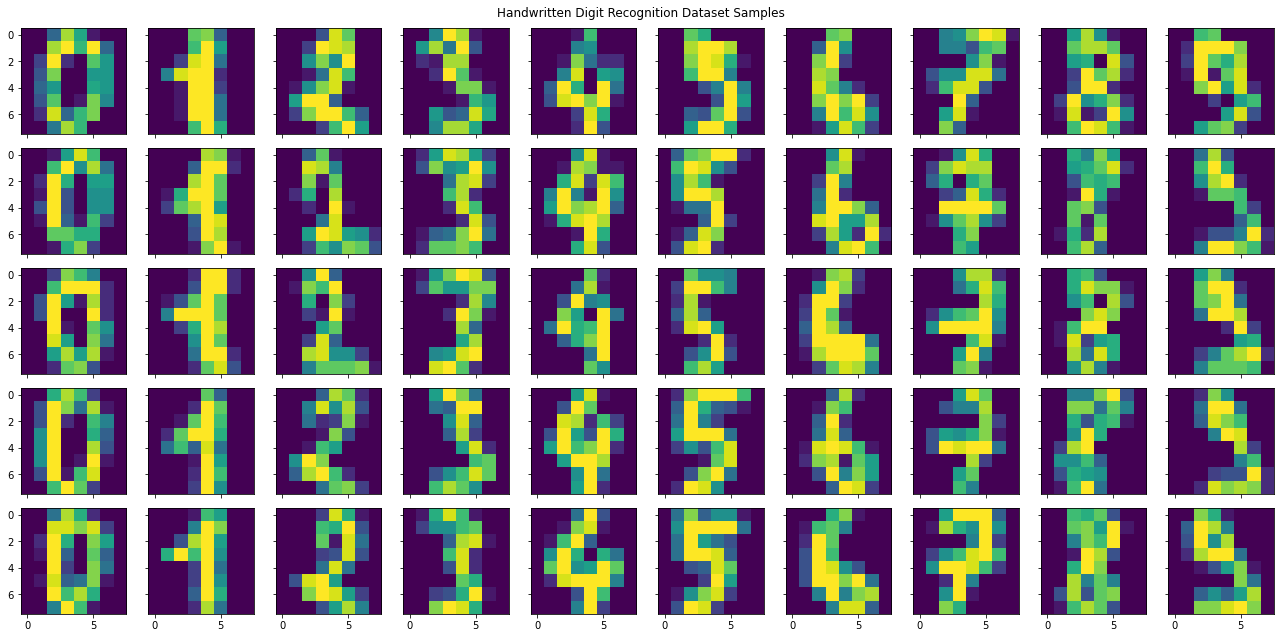

In [340]:
fig, ax = plt.subplots(5, 10, figsize=(18, 9), sharex=True, sharey=True)
for i in range(10):
    for j in range(5):
        ax[j, i].imshow(X[y==i][j].reshape(8, 8))
fig.suptitle("Handwritten Digit Recognition Dataset Samples")
plt.tight_layout()

## Sorular:
1. Rakam tasniflendirme icin uygun Naive Bayes modelini egitip degerlendiriniz.
    - Hangi tip dagilim en iyi calisti?
    - Gaussian NB'ye ozel olarak, `var_smoothing` parametresini `0` olarak ayarladiginizda bir problemle karsilastiniz mi?
        - Problemin sebebi ne olabilir?
2. Etiketlerin dagilimina gore; hangi olcumler model performansini degerlendirmek icin uygun olabilir?
3. `1` rakamlari icin recall skorunun en az %80 olmasi istenmektedir. Bunu gerceklestirmek icin hangi parametreleri kullanirsiniz?
4. Naive Bayes algoritmasi, bu veri seti icin uygun bir secim midir? Neden? Tartisiniz.